## Lab | Customer Analysis Round 2

In [1]:
import pandas as pd
import numpy as nm

In [2]:
# For this lab, we will be using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using the Online Excel.

# Note: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.

# Dealing with the data
# Show the dataframe shape.
# Standardize header names.
# Which columns are numerical?
# Which columns are categorical?
# Check and deal with NaN values.
# Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
# BONUS: Put all the previously mentioned data transformations into a function.

In [3]:
mark=pd.read_csv('marketing_customer_analysis.csv')
mark=mark.drop('Unnamed: 0', axis=1)
mark

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
# Show the dataframe shape.
mark.shape

(10910, 25)

In [5]:
# Standardize header names.
cols=[]
for column in mark.columns:
    cols.append(column.lower())
cols
mark.columns=cols
mark
display(mark.head(0))

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type


In [6]:
#Which columns are numerical?
mark._get_numeric_data()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [7]:
#Which columns are categorical?
mark.select_dtypes('object')

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [8]:
# Check and deal with NaN values.
mark.isna().sum()
mark = mark[mark['state'].isna()==False] # Since these nulls are not a lot, we can filter them
mark.isna().sum()
mark.shape

(10279, 25)

In [9]:
# Datetime format - Extract the months from the dataset and store in a separate column. 
#Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
mark['effective to date'] = pd.to_datetime(mark['effective to date'], errors='coerce')
mark.dtypes
mark['month']=mark['effective to date'][0].month
mark['month']
mark[mark['month']<2]
display(mark)

<ipython-input-9-e4dd3a27aec9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mark['effective to date'] = pd.to_datetime(mark['effective to date'], errors='coerce')
<ipython-input-9-e4dd3a27aec9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mark['month']=mark['effective to date'][0].month


,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,2
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,2
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,2
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2


In [10]:
# BONUS: Put all the previously mentioned data transformations into a function.
def market_analysis():
    mark=pd.read_csv('marketing_customer_analysis.csv')
    mark=mark.drop('Unnamed: 0', axis=1)
    mark.shape
    cols=[]
    for column in mark.columns:
        cols.append(column.lower())
    cols
    mark.columns=cols
    mark
    display(mark.head(0))
    mark._get_numeric_data()
    mark.select_dtypes('object')
    mark.isna().sum()
    mark = mark[mark['state'].isna()==False] # Since these nulls are not a lot, we can filter them
    mark.isna().sum()
    mark.shape
    mark['effective to date'] = pd.to_datetime(mark['effective to date'], errors='coerce')
    mark.dtypes
    mark['month']=mark['effective to date'][0].month
    mark['month']
    mark[mark['month']<2]
    return mark

## Lab | Customer Analysis Round 3

In [11]:
# Show DataFrame info.
display(mark)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,2
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,2
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,2
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2


In [12]:
# Describe DataFrame.
round(mark.describe(),2)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
count,10279.00,10279.00,10279.00,9688.00,10279.00,9688.00,10279.00,10279.00,10279.0
mean,8029.23,37541.33,93.25,15.13,48.13,0.38,2.97,435.74,2.0
std,6917.29,30350.23,34.45,10.06,27.92,0.91,2.39,292.32,0.0
min,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10,2.0
25%,4013.08,0.00,68.00,6.00,24.00,0.00,1.00,272.79,2.0
50%,5780.18,33837.00,83.00,14.00,48.00,0.00,2.00,384.00,2.0
75%,8992.38,62100.50,109.00,23.00,71.00,0.00,4.00,548.33,2.0
max,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24,2.0


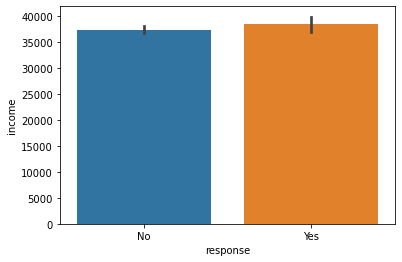

In [13]:
# Show a plot of the total number of responses.
# import matplotlib.pyplot as plt
# plt.scatter(x=mark['response'], y=mark['income'])
# plt.show()
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
mark['response'].value_counts()
sns.barplot(x="response", y="income", data=mark)
plt.show()


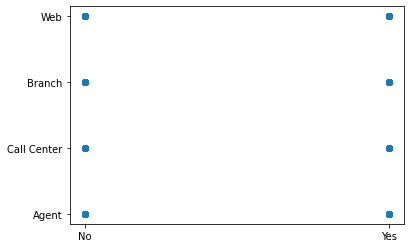

In [14]:
# Show a plot of the response rate by the sales channel.
plt.scatter(x=mark['response'], y=mark['sales channel'])
plt.show()

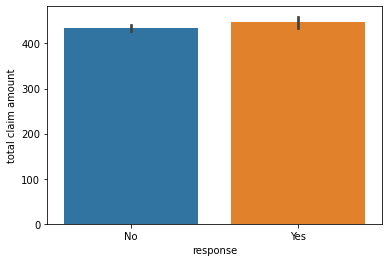

In [15]:
# Show a plot of the response rate by the total claim amount.
sns.barplot(x="response", y="total claim amount", data=mark)
plt.show()

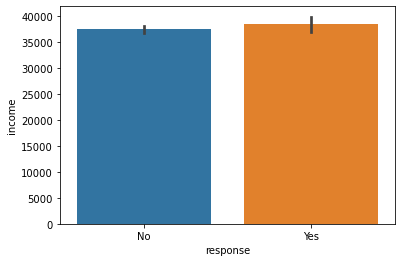

In [16]:
# Show a plot of the response rate by income.
sns.barplot(x="response", y="income", data=mark)
plt.show()

In [17]:
mark.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type', 'month'],
      dtype='object')

In [18]:
mark['sales channel'].value_counts()
mark_sales={}
names = mark['sales channel'].value_counts(dropna=False).tolist()
counts = mark['sales channel'].value_counts(dropna=False).keys().tolist()

results = []

for name, count in zip(counts, names):
    results.append({name,count})

print(results)

[{'Agent', 3890}, {2865, 'Branch'}, {'Call Center', 2013}, {'Web', 1511}]


## Lab | Customer Analysis Round 4

In [19]:
#Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
mark.dtypes
numerical= mark[['customer lifetime value','income','monthly premium auto','months since last claim','months since policy inception','number of open complaints','number of policies','total claim amount','month']].copy()
categoricals=mark.drop(['customer lifetime value','income','monthly premium auto','months since last claim','months since policy inception','number of open complaints','number of policies','total claim amount','month'],axis=1)
display(numerical)
display(categoricals)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,2
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,2
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645,2
...,...,...,...,...,...,...,...,...,...
10904,19228.463620,0,187,14.0,32,0.0,2,897.600000,2
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000,2
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,2
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2


,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,2011-01-17,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,QI63521,Nevada,No,Basic,High School or Below,2011-02-24,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
10905,FE99816,Nevada,No,Premium,Bachelor,2011-01-19,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,2011-01-06,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2011-02-06,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN


In [43]:
numerical_cols = mark.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = mark.select_dtypes(include=['object']).columns.tolist()
numerical_cols
categorical_cols

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location code',
 'marital status',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'vehicle class',
 'vehicle size',
 'vehicle type']

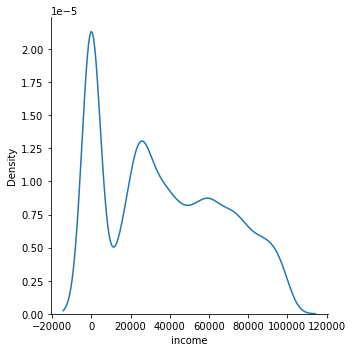

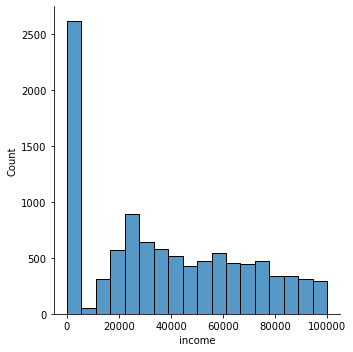

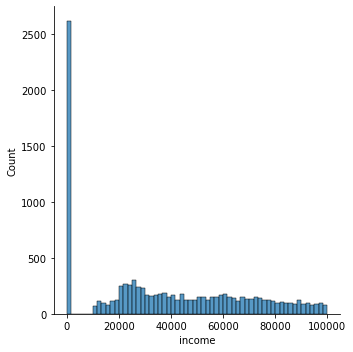

In [34]:
#Now we will try to check the normality of the numerical variables visually
#Use seaborn library to construct distribution plots for the numerical variables
import matplotlib.pyplot as plt
import seaborn as sns 
sns.displot(data=numerical, x = 'income', kind='kde')
sns.displot(numerical['income'])
sns.displot(numerical['income'], bins=60)
plt.show()

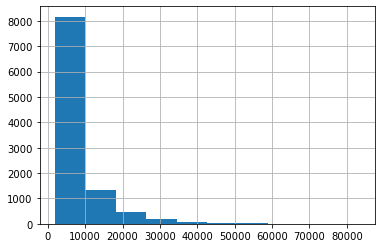

In [47]:
#Use Matplotlib to construct histograms
mark['customer lifetime value'].hist()
plt.show()



In [50]:
#For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
mark.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10279.0,8029.229015,6917.287221,1898.007675,4013.084627,5780.182197,8992.381828,83325.381190
income,10279.0,37541.332425,30350.225408,0.000000,0.000000,33837.000000,62100.500000,99981.000000
monthly premium auto,10279.0,93.245063,34.445333,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,9688.0,15.129851,10.062316,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,10279.0,48.134157,27.921951,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,9688.0,0.383567,0.910502,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,10279.0,2.970912,2.394379,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,10279.0,435.736506,292.321294,0.099007,272.788141,384.000000,548.327777,2893.239678
month,10279.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [53]:
from sklearn.metrics import mean_squared_error, r2_score
mark['total claim amount'].corr(mark['monthly premium auto'])

0.6314098201414036

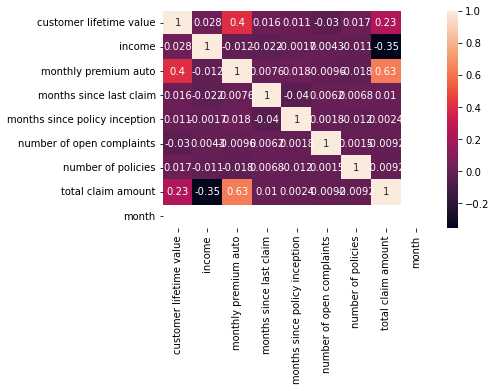

In [56]:
correlations_matrix = mark.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()